In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression,Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor # 딥러닝 neural_network
from sklearn.metrics import r2_score# 선형 모델(Linear Models)

from sklearn.model_selection import train_test_split

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False


In [84]:
# 행렬데이터로 입력 (n행 1열)
x_data = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y_data = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)


In [85]:
x_data.shape

(9, 1)

In [86]:
# n행 1열 : 행(데이터의 개수), 열 (특성 데이터의 개수)

In [87]:
# LinearRegression 객체 생성 
model_lr = LinearRegression() # 공식
model_lr.fit(x_data, y_data)  # 특성 데이터는 반드시 행렬(np 2차원)), 데이터프레임)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
model_lr.coef_ # w값 기울기

array([[1.]])

In [89]:
model_lr.intercept_ # b값 y절편

array([-8.8817842e-16])

In [90]:
carDF = pd.read_csv('../data/cars.csv')
carDF.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [91]:
carDF[['speed']].head()

,speed
0,4
1,4
2,7
3,7
4,8


In [92]:
carDF[['dist']].head()

,dist
0,2
1,10
2,4
3,22
4,16


In [93]:
modelCar = LinearRegression()
modelCar.fit(carDF[['speed']],carDF[['dist']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
# 기울기
modelCar.coef_

# 기울기 값 가져오기
modelCar.coef_[0]

array([3.93240876])

In [95]:
# y절편
modelCar.intercept_

array([-17.57909489])

In [96]:
# 자동차속도 15
modelCar.coef_[0] * 15 + modelCar.intercept_

array([41.4070365])

In [97]:
# predict는 매트릭스(행렬): 행렬곱을 수행
modelCar.predict([[15]])

array([[41.4070365]])

In [98]:
# 자동차 속도 13, 15
modelCar.predict([[13],[15]])

array([[33.54221898],
       [41.4070365 ]])

In [99]:
x = np.array([[1,2],[3,4]])
y = np.array([[3,4],[5,6]])

In [100]:
# 행렬곱
np.matmul(x,y)

array([[13, 16],
       [29, 36]])

In [101]:
modelCar.predict(carDF[['speed']])

array([[-1.84945985],
       [-1.84945985],
       [ 9.94776642],
       [ 9.94776642],
       [13.88017518],
       [17.81258394],
       [21.7449927 ],
       [21.7449927 ],
       [21.7449927 ],
       [25.67740146],
       [25.67740146],
       [29.60981022],
       [29.60981022],
       [29.60981022],
       [29.60981022],
       [33.54221898],
       [33.54221898],
       [33.54221898],
       [33.54221898],
       [37.47462774],
       [37.47462774],
       [37.47462774],
       [37.47462774],
       [41.4070365 ],
       [41.4070365 ],
       [41.4070365 ],
       [45.33944526],
       [45.33944526],
       [49.27185401],
       [49.27185401],
       [49.27185401],
       [53.20426277],
       [53.20426277],
       [53.20426277],
       [53.20426277],
       [57.13667153],
       [57.13667153],
       [57.13667153],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [61.06908029],
       [68.93389781],
       [72.86630657],
       [76

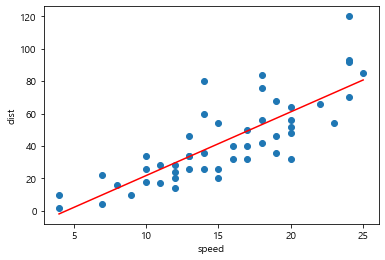

In [102]:
# 시각화

# 실제값
plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter(carDF['speed'],carDF['dist'])

# 예측값
plt.plot(carDF['speed'],modelCar.predict(carDF[['speed']]), 'r')
plt.show()

### 연습문제
electric.csv  w, b를 구하시고
전기생산량이 3.2, 4.5 인경우 전기 사용량을 예측하시요.
scatter(실제데이터), plot(예측데이터)를 그리시요.




In [103]:
# 데이터 불러오기
eleDF = pd.read_csv('../data/electric.csv',index_col='Unnamed: 0')
eleDF.head()

,전기생산량,전기사용량
0,3.52,2.48
1,2.58,2.27
2,3.31,2.47
3,4.07,2.77
4,4.62,2.98


In [104]:
# 모델적용, 학습
modelEle = LinearRegression()
modelEle.fit(eleDF[['전기생산량']],eleDF[['전기사용량']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
# 기울기 w
modelEle.coef_

array([[0.49560324]])

In [106]:
# y절편 b
modelEle.intercept_

array([0.91958143])

In [107]:
# 예측
modelEle.predict([[3.2],[4.5]])

array([[2.50551178],
       [3.14979599]])

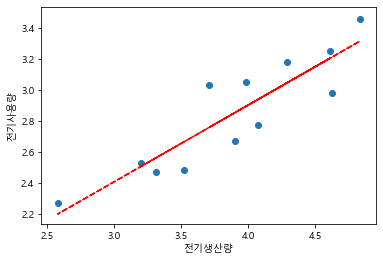

In [108]:
# 시각화

# 실제값
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.scatter(eleDF['전기생산량'],eleDF['전기사용량'])

# 예측값
plt.plot(eleDF['전기생산량'],modelEle.predict(eleDF[['전기생산량']]), 'r--')
plt.show()

* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용


$ SSR( 예측값- 평균값)^2 의합$ <br>
$ SST( 실제값- 평균값)^2 의합$ <br>
$ SSE( 실제값- 예측값)^2 의합$ <br>
$ R^2 = \frac{SSR}{SST} = 1-\frac{SSE}{SST}   $


결정 계수 (Coefficient of determination, <br>
R 제곱 (R^2, R-squared, 피어슨 상관 계수의 제곱))<br>
 1 - (오차의 제곱합)/(편차의 제곱합)<br>
오차는 실제 값과 예측 값의 차이<br>
편차는 실제 값과 평균 값의 차이<br>
0 <= 결정 계수 <= 1 (0이면 0점, 1이면 100점)<br>
높을 수록 좋음<br>

from sklearn.metrics import r2_score<br>
y_predict = model.predict( x_data )<br>
r2_score( y_data, y_predict )<br>

In [121]:
# r2_score값 구하기
modelCar.score(carDF[['speed']],carDF[['dist']])

0.6510793807582509

In [111]:
# r2_score값 구하기
from sklearn.metrics import r2_score
y2_predict = modelCar.predict(carDF[['speed']])
r2_score(carDF.dist, y2_predict)

0.6510793807582509

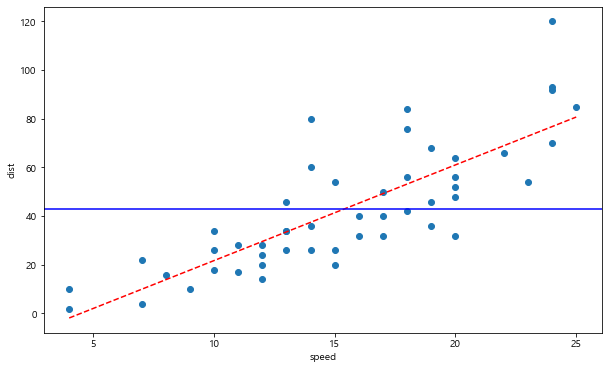

In [110]:
plt.figure( figsize=(10,6))
plt.xlabel('speed')
plt.ylabel('dist')
predictions = modelCar.predict(  carDF[['speed']] )
plt.scatter(carDF.speed, carDF.dist)
plt.plot( carDF.speed, predictions, 'r--') 

plt.axhline( carDF.dist.mean(),color='blue') # dist값의 평균
plt.show()


### 학습을 통한 선형회귀


In [209]:
# alpha = 0.0001 (런닝레이트)
# max_iter = 1000 (학습횟수)
# early_stopping = True, (cost값이 변화가 없다, 학습이되어 최저점에 도달하면 빠져나감)
# verbose = 1 학습한 내용(횟수)을 프린트

modelSGD = SGDRegressor(max_iter=100, alpha=0.0001,
                        verbose=1,
                         early_stopping= True)
modelSGD.fit(carDF[['speed']],carDF[['dist']])


-- Epoch 1
Norm: 4.02, NNZs: 1, Bias: -0.011702, T: 45, Avg. loss: 453.503686
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.32, NNZs: 1, Bias: -0.340615, T: 90, Avg. loss: 268.437625
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.39, NNZs: 1, Bias: -0.516013, T: 135, Avg. loss: 224.970878
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.33, NNZs: 1, Bias: -0.785608, T: 180, Avg. loss: 185.312304
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.47, NNZs: 1, Bias: -0.954533, T: 225, Avg. loss: 186.391401
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.36, NNZs: 1, Bias: -1.067676, T: 270, Avg. loss: 174.849831
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.50, NNZs: 1, Bias: -1.260135, T: 315, Avg. loss: 154.518023
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.43, NNZs: 1, Bias: -1.463533, T: 360, Avg. loss: 183.450170
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 2.87, NNZs: 1, Bias: -1.642424, T: 405, Avg. loss: 151.286432
Total train

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [167]:
modelSGD.coef_

array([2.97308084])

In [166]:
modelSGD.intercept_

array([-5.82145298])

### 딥러닝을 이용한 선형회귀

In [224]:
# 하이퍼 파라미터 설정
# hidden_layer_sizes (100,10) : 100개짜리 세트10개

modelNN = MLPRegressor(max_iter=5000, alpha=0.001,
                         hidden_layer_sizes= (100,10))
modelNN.fit(carDF[['speed']], carDF['dist'])

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=5000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

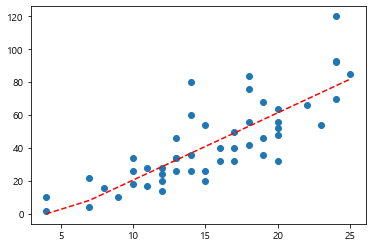

In [225]:
plt.scatter(  carDF['speed'], carDF['dist'])
plt.plot(  carDF['speed'], modelNN.predict( carDF[['speed']] ) , 'r--')
plt.show()